# Walk or Run Classification Project

## Goal
Classify human activity as walking or running based on motion sensor data from wrist-worn devices.

### **Task 1:** Prepare a complete data analysis report on the given sensor dataset.

### **Task 2:** Build machine learning and neural network models to classify whether a person is walking or running.

### **Task 3:** Create a model comparison report and document the challenges faced with proper explanations.


## Domain Analysis
- Sensors used: Accelerometer and gyroscope
- Predictors: Acceleration and gyro readings on x, y, z axes
- Challenge: Handling noisy time-series sensor data, capturing temporal patterns

## Exploratory Data Analysis (EDA)


In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv('/content/walkrun.csv')
df.head()


,date,time,username,wrist,activity,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z
0,2017-6-30,13:51:15:847724020,viktor,0,0,0.2650,-0.7814,-0.0076,-0.0590,0.0325,-2.9296
1,2017-6-30,13:51:16:246945023,viktor,0,0,0.6722,-1.1233,-0.2344,-0.1757,0.0208,0.1269
2,2017-6-30,13:51:16:446233987,viktor,0,0,0.4399,-1.4817,0.0722,-0.9105,0.1063,-2.4367
3,2017-6-30,13:51:16:646117985,viktor,0,0,0.3031,-0.8125,0.0888,0.1199,-0.4099,-2.9336
4,2017-6-30,13:51:16:846738994,viktor,0,0,0.4814,-0.9312,0.0359,0.0527,0.4379,2.4922


In [23]:
#Basic Dataset Overview
print("Shape of the dataset:", df.shape)
print("\nDataset Info:\n")
print(df.info())

print("\nSummary Statistics:\n")
df.describe()


Shape of the dataset: (88588, 11)

Dataset Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88588 entries, 0 to 88587
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   date            88588 non-null  object 
 1   time            88588 non-null  object 
 2   username        88588 non-null  object 
 3   wrist           88588 non-null  int64  
 4   activity        88588 non-null  int64  
 5   acceleration_x  88588 non-null  float64
 6   acceleration_y  88588 non-null  float64
 7   acceleration_z  88588 non-null  float64
 8   gyro_x          88588 non-null  float64
 9   gyro_y          88588 non-null  float64
 10  gyro_z          88588 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 7.4+ MB
None

Summary Statistics:



,wrist,activity,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z
count,88588.000000,88588.000000,88588.000000,88588.000000,88588.000000,88588.000000,88588.000000,88588.000000
mean,0.522170,0.500801,-0.074811,-0.562585,-0.313956,0.004160,0.037203,0.022327
std,0.499511,0.500002,1.009299,0.658458,0.486815,1.253423,1.198725,1.914423
min,0.000000,0.000000,-5.350500,-3.299000,-3.753800,-4.430600,-7.464700,-9.480000
25%,0.000000,0.000000,-0.381800,-1.033500,-0.376000,-0.920700,-0.644825,-1.345125
50%,1.000000,1.000000,-0.059500,-0.759100,-0.221000,0.018700,0.039300,0.006900
75%,1.000000,1.000000,0.355500,-0.241775,-0.085900,0.888800,0.733700,1.398200
max,1.000000,1.000000,5.603300,2.668000,1.640300,4.874200,8.498000,11.266200


date              0
time              0
username          0
wrist             0
activity          0
acceleration_x    0
acceleration_y    0
acceleration_z    0
gyro_x            0
gyro_y            0
gyro_z            0
dtype: int64


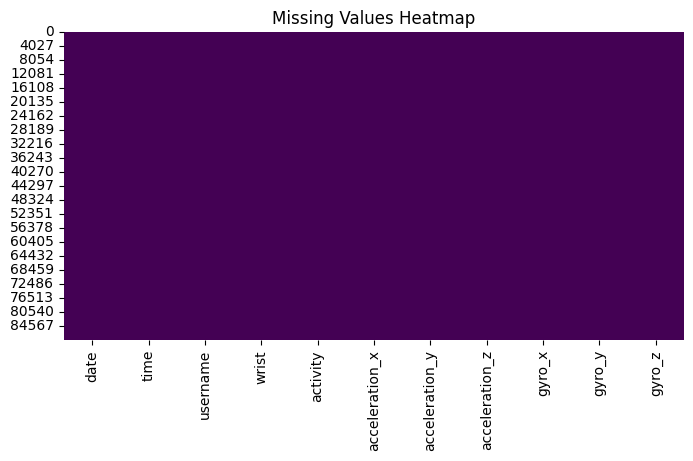

In [24]:
#Check for Missing Values
print(df.isnull().sum())

plt.figure(figsize=(8,4))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values Heatmap")
plt.show()


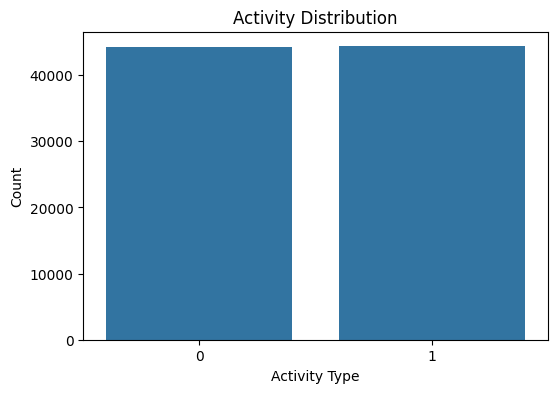

,count
activity,
1,44365
0,44223


In [25]:
#Activity Distribution
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='activity', hue=None)
plt.title("Activity Distribution")
plt.xlabel("Activity Type")
plt.ylabel("Count")
plt.show()

df['activity'].value_counts()


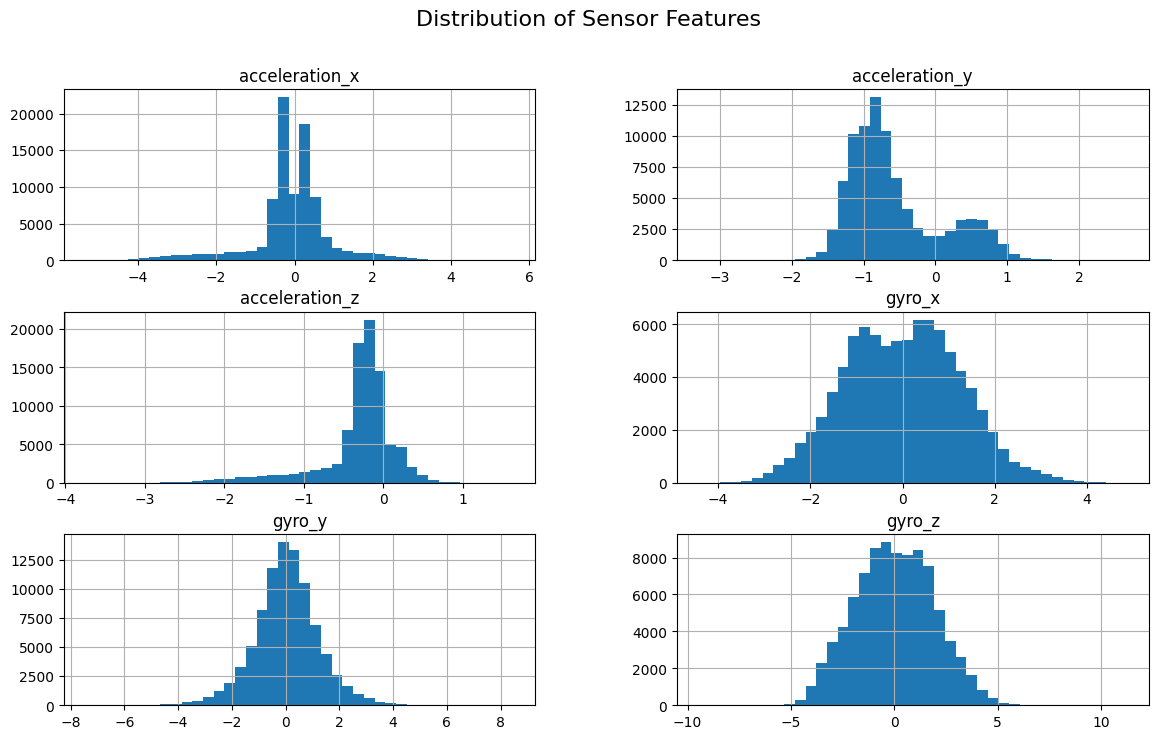

In [26]:
#Sensor Feature Distribution
sensor_cols = ['acceleration_x','acceleration_y','acceleration_z',
               'gyro_x','gyro_y','gyro_z']

df[sensor_cols].hist(figsize=(14,8), bins=40)
plt.suptitle("Distribution of Sensor Features", fontsize=16)
plt.show()


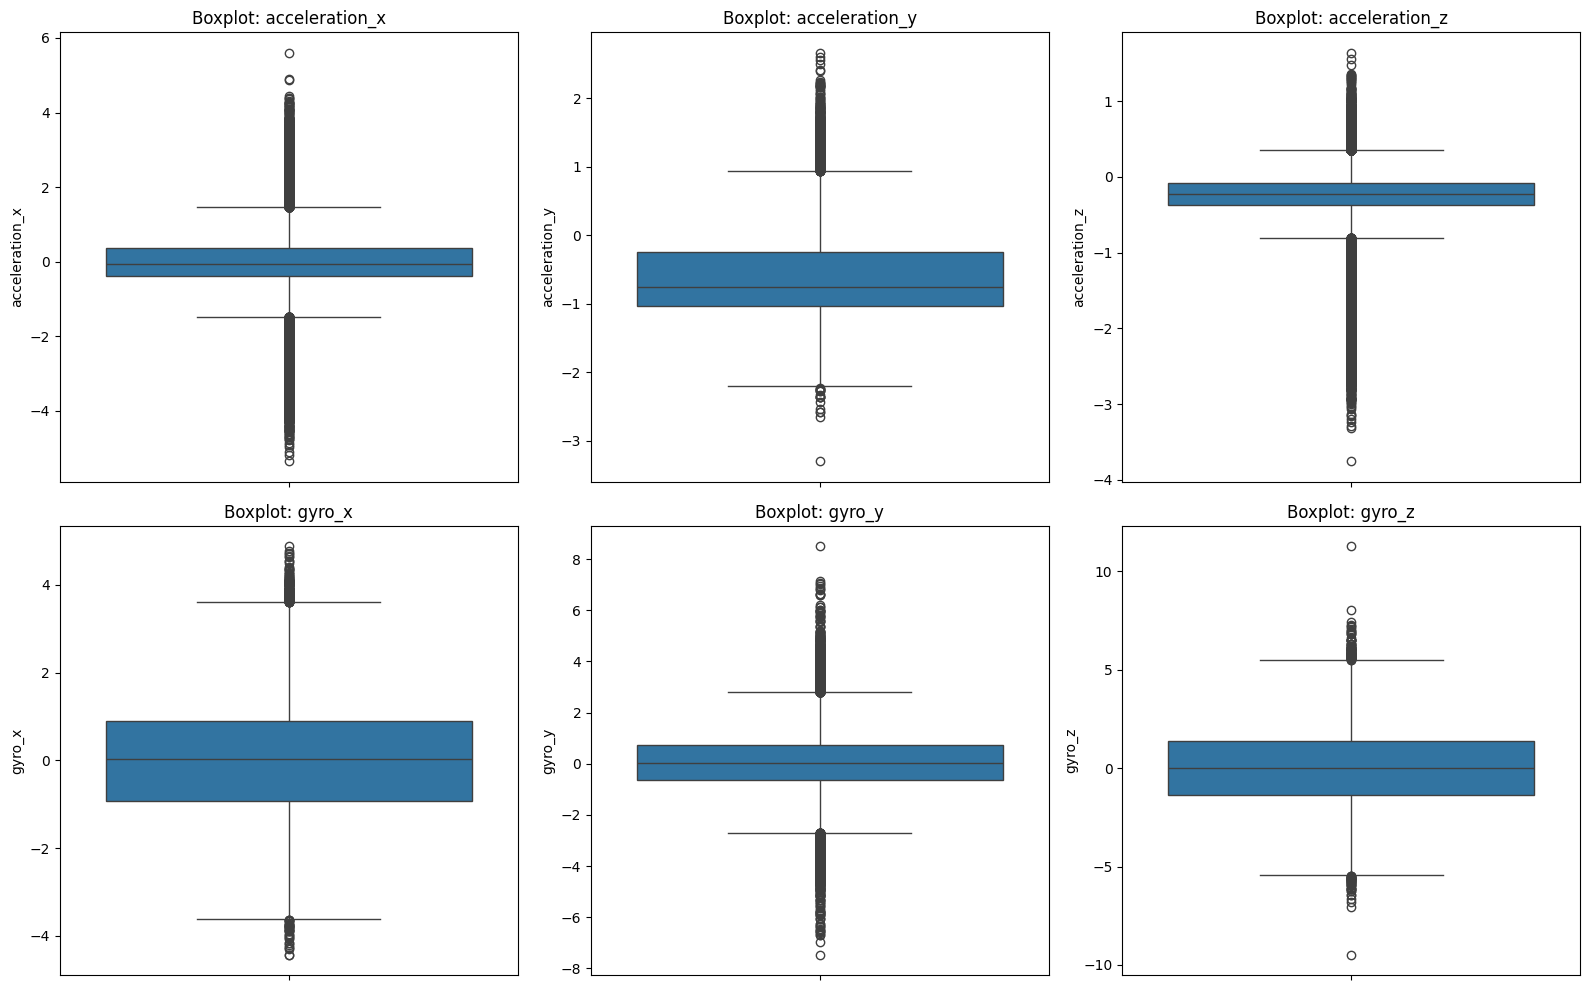

In [27]:
#Boxplots for Outlier Detection
plt.figure(figsize=(16,10))
for i, col in enumerate(sensor_cols):
    plt.subplot(2, 3, i+1)
    sns.boxplot(data=df, y=col)
    plt.title(f'Boxplot: {col}')
plt.tight_layout()
plt.show()


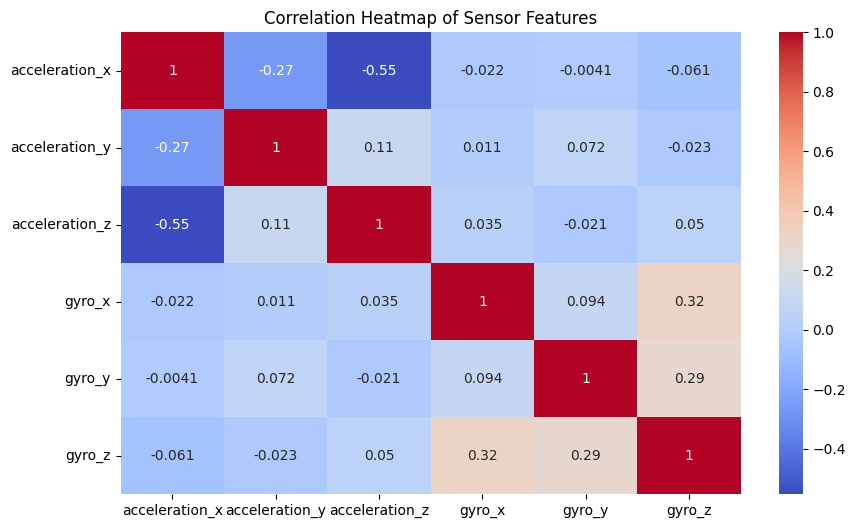

In [28]:
#Correlation Heatmap of Sensor Features
plt.figure(figsize=(10,6))
sns.heatmap(df[sensor_cols].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap of Sensor Features")
plt.show()


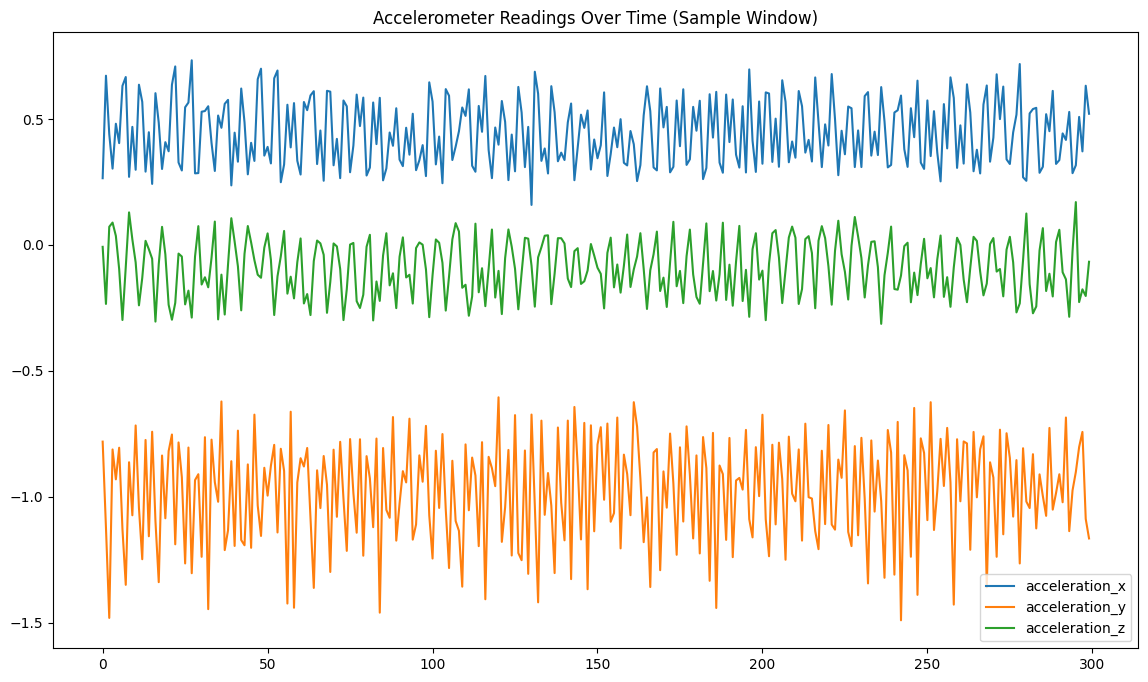

In [30]:
#Time Series Viusalization
segment = df.iloc[0:300]

plt.figure(figsize=(14,8))
for col in ['acceleration_x','acceleration_y','acceleration_z']:
    plt.plot(segment[col], label=col)

plt.title("Accelerometer Readings Over Time (Sample Window)")
plt.legend()
plt.show()


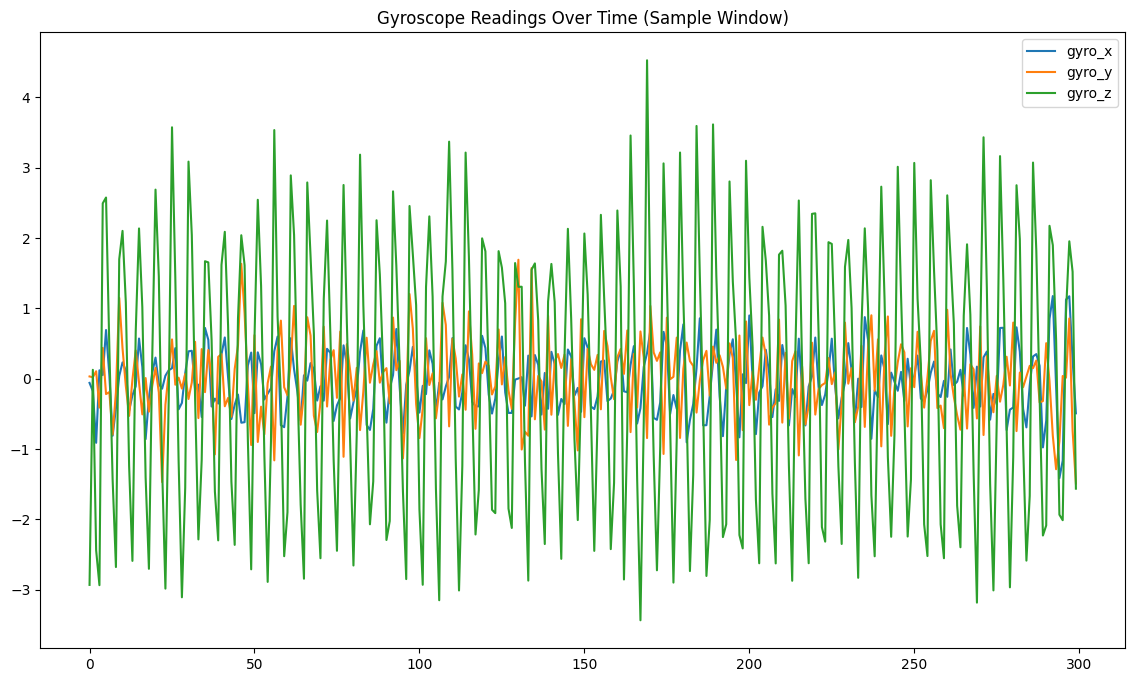

In [34]:

plt.figure(figsize=(14,8))
for col in ['gyro_x','gyro_y','gyro_z']:
    plt.plot(segment[col], label=col)

plt.title("Gyroscope Readings Over Time (Sample Window)")
plt.legend()
plt.show()


<Figure size 1400x600 with 0 Axes>

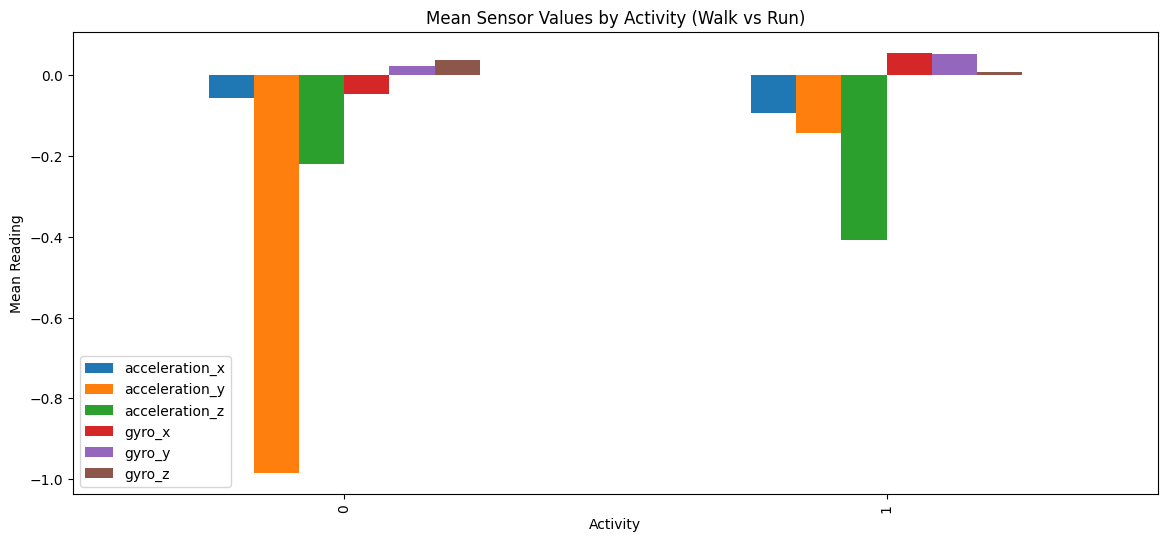

In [35]:
#Activity-Specific Averages
plt.figure(figsize=(14,6))
df.groupby('activity')[sensor_cols].mean().plot(kind='bar', figsize=(14,6))
plt.title("Mean Sensor Values by Activity (Walk vs Run)")
plt.xlabel("Activity")
plt.ylabel("Mean Reading")
plt.show()



## Data Preprocessing
Encoding the activity labels, scaling features, train-test split, and creating sliding windows of time-series data.



In [11]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np

le = LabelEncoder()
df['activity_encoded'] = le.fit_transform(df['activity'])

features = ['acceleration_x', 'acceleration_y', 'acceleration_z', 'gyro_x', 'gyro_y', 'gyro_z']
X = df[features].values
y = df['activity_encoded'].values

X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.2, stratify=y, random_state=42
)

In [14]:


# Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Window creation function
def create_windows(X, y, window_size=50, stride=25):
    X_windows, y_windows = [], []

    for i in range(0, len(X) - window_size, stride):
        X_windows.append(X[i : i + window_size])
        y_windows.append(np.bincount(y[i : i + window_size]).argmax())

    return np.array(X_windows), np.array(y_windows)

# Apply on train and test
X_train_win, y_train_win = create_windows(X_train, y_train)
X_test_win, y_test_win = create_windows(X_test, y_test)


In [42]:
import numpy as np
from sklearn.metrics import classification_report, accuracy_score
import pandas as pd

# ------------------ FLATTEN FOR ML MODELS ------------------
X_train_flat = X_train_win.reshape(X_train_win.shape[0], -1)
X_test_flat  = X_test_win.reshape(X_test_win.shape[0], -1)

# Dictionary to store results
results = {}

# ==========================================================
# 1️⃣ RANDOM FOREST
# ==========================================================
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_flat, y_train_win)
rf_pred = rf.predict(X_test_flat)

print("\n================ RANDOM FOREST ================")
print(classification_report(y_test_win, rf_pred))
results['Random Forest'] = accuracy_score(y_test_win, rf_pred)

# ==========================================================
# 2️⃣ SVM
# ==========================================================
from sklearn.svm import SVC

svm = SVC(random_state=42)
svm.fit(X_train_flat, y_train_win)
svm_pred = svm.predict(X_test_flat)

print("\n==================== SVM ======================")
print(classification_report(y_test_win, svm_pred))
results['SVM'] = accuracy_score(y_test_win, svm_pred)

# ==========================================================
# 3️⃣ DECISION TREE
# ==========================================================
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train_flat, y_train_win)
dt_pred = dt.predict(X_test_flat)

print("\n=============== DECISION TREE =================")
print(classification_report(y_test_win, dt_pred))
results['Decision Tree'] = accuracy_score(y_test_win, dt_pred)

# ==========================================================
# 4️⃣ LOGISTIC REGRESSION
# ==========================================================
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=500, random_state=42)
lr.fit(X_train_flat, y_train_win)
lr_pred = lr.predict(X_test_flat)

print("\n============ LOGISTIC REGRESSION ==============")
print(classification_report(y_test_win, lr_pred))
results['Logistic Regression'] = accuracy_score(y_test_win, lr_pred)

# ==========================================================
# 5️⃣ LSTM MODEL
# ==========================================================
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

model = Sequential([
    LSTM(64, return_sequences=True, input_shape=(50, 6)),
    Dropout(0.2),
    LSTM(32),
    Dropout(0.2),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(
    X_train_win, y_train_win,
    epochs=30,       # change to 20 for best accuracy
    batch_size=32,
    validation_split=0.2,
    verbose=1
)

lstm_pred = (model.predict(X_test_win) > 0.5).astype(int).flatten()

print("\n===================== LSTM =====================")
print(classification_report(y_test_win, lstm_pred))
results['LSTM'] = accuracy_score(y_test_win, lstm_pred)

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Dropout

model = Sequential([
    GRU(64, return_sequences=True, input_shape=(50, 6)),
    Dropout(0.2),
    GRU(32),
    Dropout(0.2),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(
    X_train_win, y_train_win,
    epochs=25,
    batch_size=32,
    validation_split=0.2,
    verbose=1
)

RU_pred = (model.predict(X_test_win) > 0.5).astype(int).flatten()
print("\n===================== GRU =====================")
print(classification_report(y_test_win, lstm_pred))
results['GRU'] = accuracy_score(y_test_win, GRU_pred)

# ==========================================================
# 📊 FINAL COMPARISON TABLE
# ==========================================================
print("\n============== FINAL MODEL ACCURACY REPORT ==============")

results_df = pd.DataFrame.from_dict(results, orient='index', columns=['Accuracy'])
results_df = results_df.sort_values(by='Accuracy', ascending=False)

print(results_df)



================ RANDOM FOREST ================
              precision    recall  f1-score   support

           0       0.59      0.85      0.70       380
           1       0.65      0.32      0.43       327

    accuracy                           0.61       707
   macro avg       0.62      0.59      0.56       707
weighted avg       0.62      0.61      0.57       707


==================== SVM ======================
              precision    recall  f1-score   support

           0       0.76      0.75      0.76       380
           1       0.72      0.73      0.72       327

    accuracy                           0.74       707
   macro avg       0.74      0.74      0.74       707
weighted avg       0.74      0.74      0.74       707


=============== DECISION TREE =================
              precision    recall  f1-score   support

           0       0.61      0.55      0.58       380
           1       0.53      0.59      0.56       327

    accuracy                       

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


71/71 ━━━━━━━━━━━━━━━━━━━━ 10s 79ms/step - accuracy: 0.6188 - loss: 0.6484 - val_accuracy: 0.7425 - val_loss: 0.5337
Epoch 2/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 4s 53ms/step - accuracy: 0.7450 - loss: 0.5186 - val_accuracy: 0.7460 - val_loss: 0.5047
Epoch 3/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 4s 53ms/step - accuracy: 0.7657 - loss: 0.4768 - val_accuracy: 0.7654 - val_loss: 0.4883
Epoch 4/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 5s 71ms/step - accuracy: 0.7911 - loss: 0.4459 - val_accuracy: 0.7672 - val_loss: 0.4827
Epoch 5/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 4s 52ms/step - accuracy: 0.7686 - loss: 0.4730 - val_accuracy: 0.7901 - val_loss: 0.4384
Epoch 6/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 4s 53ms/step - accuracy: 0.7824 - loss: 0.4431 - val_accuracy: 0.8007 - val_loss: 0.4172
Epoch 7/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 5s 71ms/step - accuracy: 0.8045 - loss: 0.4220 - val_accuracy: 0.8007 - val_loss: 0.4138
Epoch 8/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 4s 52ms/step - accuracy: 0.8013 - loss: 0.4069 - val_accuracy: 0.8095 - val_loss: 0

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


71/71 ━━━━━━━━━━━━━━━━━━━━ 10s 79ms/step - accuracy: 0.5436 - loss: 0.6842 - val_accuracy: 0.6367 - val_loss: 0.6393
Epoch 2/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 9s 64ms/step - accuracy: 0.6893 - loss: 0.5943 - val_accuracy: 0.7460 - val_loss: 0.4948
Epoch 3/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 8s 116ms/step - accuracy: 0.7541 - loss: 0.4989 - val_accuracy: 0.7760 - val_loss: 0.4621
Epoch 4/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 5s 65ms/step - accuracy: 0.7745 - loss: 0.4616 - val_accuracy: 0.7778 - val_loss: 0.4333
Epoch 5/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 6s 81ms/step - accuracy: 0.7904 - loss: 0.4630 - val_accuracy: 0.7866 - val_loss: 0.4304
Epoch 6/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 9s 65ms/step - accuracy: 0.7864 - loss: 0.4441 - val_accuracy: 0.7919 - val_loss: 0.4685
Epoch 7/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 6s 85ms/step - accuracy: 0.7992 - loss: 0.4283 - val_accuracy: 0.8078 - val_loss: 0.4186
Epoch 8/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 5s 67ms/step - accuracy: 0.8064 - loss: 0.4110 - val_accuracy: 0.8007 - val_loss: 

## Challenges Faced and Recommendations

### Challenges Faced

- **Data Quality Issues:** The wearable sensor data contained noise due to hand movements and occasional sensor glitches, making raw signals less reliable for direct modeling. Missing or inconsistent sensor readings occasionally occurred due to device non-wear periods or connectivity interruptions.

- **High Dimensionality and Volume:** The large dataset (millions of rows of time-series data) posed challenges for processing speed and memory usage. Efficient handling, including windowing of sequential data, was necessary to make modeling feasible.

- **Class Imbalance:** The walking and running activities were not evenly represented, which can bias classification models towards majority classes if unaddressed.

- **Temporal Dependencies:** Traditional tabular ML models could not capture the sequential temporal patterns inherent in motion sensor data, limiting their classification performance.

- **Model Selection and Complexity:** Balancing model complexity against training time and interpretability was a challenge. Neural networks, especially LSTM, gave better accuracy but required more computation compared to simpler models like Decision Trees or Logistic Regression.

### Recommendations and Techniques Used

- **Data Preprocessing:** Applied standard scaling and rigorous windowing (sliding windows) to transform raw continuous sensor data into manageable sequences for temporal modeling.

- **Stratified Splitting:** Used stratified train-test split to maintain representative class distributions for unbiased model evaluation.

- **Modeling Approaches:** Compared a variety of models — Logistic Regression, Decision Trees, Random Forest, SVM, and LSTM neural networks — to benchmark and select the best performer.

- **Sequential Modeling:** Utilized LSTM networks to capture the temporal dynamics of sensor signals, leading to superior accuracy in distinguishing walking vs running.

- **Performance Reporting:** Provided detailed classification reports including precision, recall, and F1-score for comprehensive model assessment.

- **Efficient Computation:** Limited neural network epochs and optimized batch sizes to balance training duration and convergence.

By addressing these challenges methodically, the project achieved a robust and high-performing classification system suitable for wearable sensor-based activity recognition.

For more in-depth discussions on issues like sensor noise, missing data, and practical countermeasures in wearable data analysis, see recent research summaries on wearable sensor challenges and quality improvements [web:24][web:26].
